In [14]:
pip install langgraph

#Definig State Schema Using Typing  Module

In [53]:
from typing import TypedDict, Literal,Annotated
class TypedDictState(TypedDict):
  car_name: str
  car_make: str

In [59]:
# making nodes
def main_node(state):
  print("--Node 1--")
  return {"car_name":state["car_name"] + " is made by"}
def honda_node(state):
  print("--Node 2--")
  return {"car_make":"Honda"}
def toyota_node(state):
  print("--Node 3--")
  return {"car_make":"Toyota"}
def hyundai_node(state):
  print("--Node 4--")
  return {"car_make":"Hyundai"}


In [73]:
import random
def decide_node(state):
  if "civic" in state["car_name"].lower():
    return "honda_node"
  elif "camry" in state["car_name"].lower():
    return "toyota_node"
  elif "sonata" in state["car_name"].lower():
    return "hyundai_node"

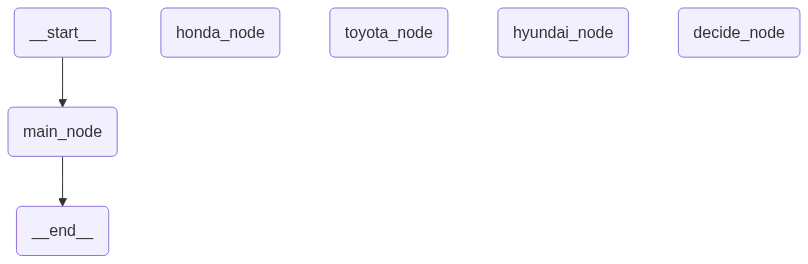

In [79]:
from langgraph.graph import StateGraph,START,END
builder = StateGraph(TypedDictState)

# node
builder.add_node("main_node",main_node)
builder.add_node("honda_node",honda_node)
builder.add_node("toyota_node",toyota_node)
builder.add_node("hyundai_node",hyundai_node)
builder.add_node("decide_node",decide_node)
# logic
builder.add_edge(START,"main_node")
builder.add_conditional_edges("main_node",decide_node)
builder.add_edge("honda_node",END)
builder.add_edge("toyota_node",END)
builder.add_edge("hyundai_node",END)
graph = builder.compile()
from IPython.display import display, Image
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [77]:
graph.invoke({"car_name":"sonata"})

--Node 1--
--Node 4--


{'car_name': 'sonata is made by', 'car_make': 'Hyundai'}

#Using Dataclass Module


In [88]:
from dataclasses import dataclass
@dataclass
class DataclassState:
  car_name:str
  car_make:str

In [97]:
# making nodes
def main_node(state):
  print("--Node 1--")
  return {"car_name":state.car_name + " is made by"}
def honda_node(state):
  print("--Node 2--")
  return {"car_make":"Honda"}
def toyota_node(state):
  print("--Node 3--")
  return {"car_make":"Toyota"}
def hyundai_node(state):
  print("--Node 4--")
  return {"car_make":"Hyundai"}

In [98]:
import random
def decide_node(state):
  if "civic" in state.car_name.lower():
    return "honda_node"
  elif "camry" in state.car_name.lower():
    return "toyota_node"
  elif "sonata" in state.car_name.lower():
    return "hyundai_node"

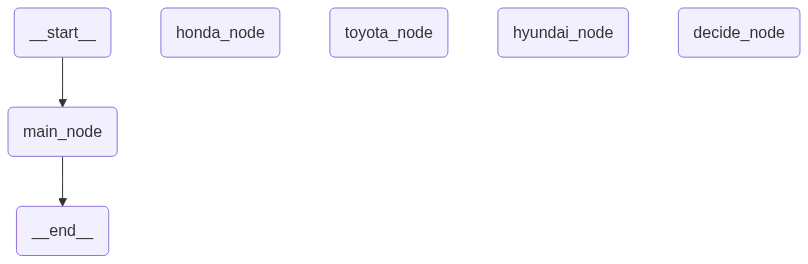

In [99]:
from langgraph.graph import StateGraph,START,END
builder = StateGraph(DataclassState)

# node
builder.add_node("main_node",main_node)
builder.add_node("honda_node",honda_node)
builder.add_node("toyota_node",toyota_node)
builder.add_node("hyundai_node",hyundai_node)
builder.add_node("decide_node",decide_node)
# logic
builder.add_edge(START,"main_node")
builder.add_conditional_edges("main_node",decide_node)
builder.add_edge("honda_node",END)
builder.add_edge("toyota_node",END)
builder.add_edge("hyundai_node",END)
graph = builder.compile()
from IPython.display import display, Image
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [104]:
graph.invoke(DataclassState(car_name="civic",car_make=""))

--Node 1--
--Node 2--


{'car_name': 'civic is made by', 'car_make': 'Honda'}

#Using Pydantic Module


In [107]:
from pydantic import BaseModel,ValidationError,field_validator
class PydanticState(BaseModel):
  car_name:str
  car_make:str
  @field_validator("car_make")
  @classmethod
  def valid_car_make(cls,value):
    if value not in ["Honda","Toyota","Hyundai"]:
      raise ValueError("Invalid Car Make")
    return value

In [110]:
# lets have a try
try:
  state = PydanticState(car_name="civic",car_make="Hondda")
  state
except ValidationError as e:
  print(e)
#

1 validation error for PydanticState
car_make
  Value error, Invalid Car Make [type=value_error, input_value='Hondda', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error


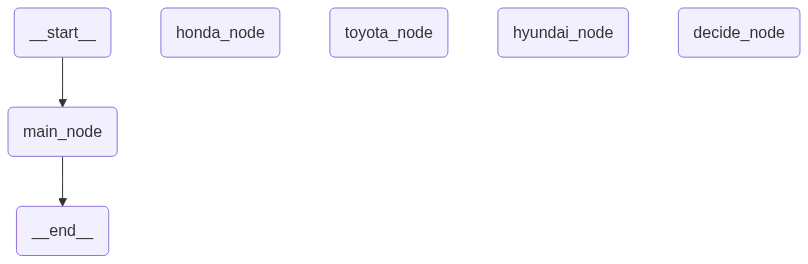

In [112]:
from langgraph.graph import StateGraph,START,END
builder = StateGraph(PydanticState)
builder.add_node("main_node",main_node)
builder.add_node("honda_node",honda_node)
builder.add_node("toyota_node",toyota_node)
builder.add_node("hyundai_node",hyundai_node)
builder.add_node("decide_node",decide_node)
builder.add_edge(START,"main_node")
builder.add_conditional_edges("main_node",decide_node)
builder.add_edge("honda_node",END)
builder.add_edge("toyota_node",END)
builder.add_edge("hyundai_node",END)
graph = builder.compile()
from IPython.display import display, Image
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [114]:
graph.invoke(PydanticState(car_name="civic",car_make="Honda"))
#

--Node 1--
--Node 2--


{'car_name': 'civic is made by', 'car_make': 'Honda'}